In [22]:
#https://www.kaggle.com/competitions/predict-the-diabetes/data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
diabets= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practice/ML/Diabetes Prediction/train.csv')

In [6]:
diabets.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,6,148,72,35,0,33.6,0.627,50,1,0
1,8,183,64,0,0,23.3,0.672,32,1,2
2,1,89,66,23,94,28.1,0.167,21,0,3
3,10,115,0,0,0,35.3,0.134,29,0,7
4,2,197,70,45,543,30.5,0.158,53,1,8
5,4,110,92,0,0,37.6,0.191,30,0,10
6,10,168,74,0,0,38.0,0.537,34,1,11
7,5,166,72,19,175,25.8,0.587,51,1,14
8,7,100,0,0,0,30.0,0.484,32,1,15
9,0,118,84,47,230,45.8,0.551,31,1,16


In [7]:
diabets.shape

(466, 10)

In [8]:
diabets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,4.032189,122.096567,68.341202,20.946352,82.319742,32.504721,0.474120,33.206009,0.377682,377.030043
std,3.395290,32.507688,20.970781,16.295765,114.428297,7.757115,0.322178,11.451461,0.485329,222.736855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,100.000000,62.000000,0.000000,0.000000,27.600000,0.240250,24.000000,0.000000,185.500000
50%,3.000000,119.000000,70.000000,23.000000,39.000000,32.450000,0.386500,29.000000,0.000000,372.500000
75%,7.000000,142.000000,80.000000,33.000000,140.000000,37.400000,0.635500,41.000000,1.000000,576.750000
max,15.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,81.000000,1.000000,766.000000


In [9]:
diabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               466 non-null    int64  
 1   Glucose                   466 non-null    int64  
 2   BloodPressure             466 non-null    int64  
 3   SkinThickness             466 non-null    int64  
 4   Insulin                   466 non-null    int64  
 5   BMI                       466 non-null    float64
 6   DiabetesPedigreeFunction  466 non-null    float64
 7   Age                       466 non-null    int64  
 8   Outcome                   466 non-null    int64  
 9   Id                        466 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 36.5 KB


0 --> Non-Diabetic

1 --> Diabetic

In [10]:
diabets['Outcome'].value_counts()

Outcome
0    290
1    176
Name: count, dtype: int64

In [11]:
diabets.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Id
Outcome,,,,,,,,,
0,3.382759,110.403448,67.903448,20.248276,72.137931,30.785172,0.427914,30.975862,385.675862
1,5.102273,141.363636,69.062500,22.096591,99.096591,35.338068,0.550256,36.880682,362.784091


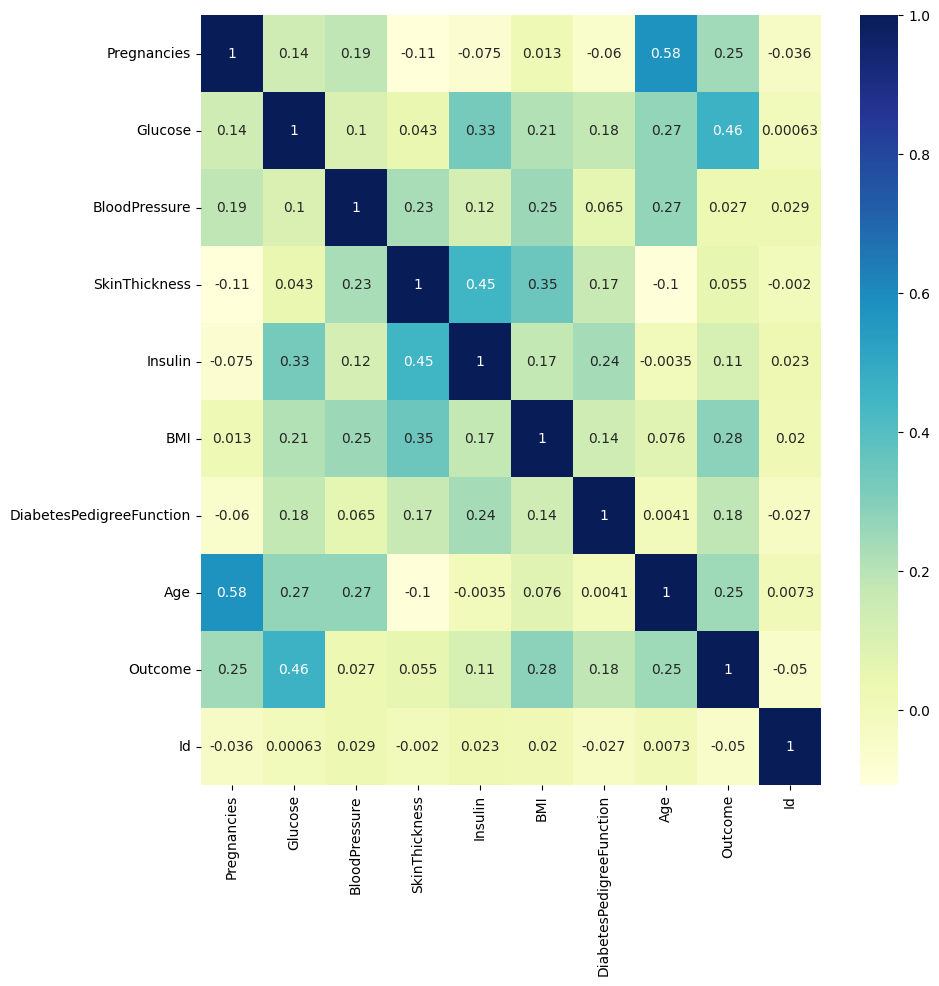

In [16]:
plt.figure(figsize=(10,10))
df= pd.DataFrame(diabets)
numeric_column=df.select_dtypes(include=['number'])
sns.heatmap(numeric_column.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [17]:
X= diabets.drop(columns=['Outcome','Id'],axis=1)
Y= diabets['Outcome']

In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,10,115,0,0,0,35.3,0.134,29
4,2,197,70,45,543,30.5,0.158,53
...,...,...,...,...,...,...,...,...
461,2,88,58,26,16,28.4,0.766,22
462,9,170,74,31,0,44.0,0.403,43
463,9,89,62,0,0,22.5,0.142,33
464,10,101,76,48,180,32.9,0.171,63


In [19]:
Y

0      1
1      1
2      0
3      0
4      1
      ..
461    0
462    1
463    0
464    0
465    1
Name: Outcome, Length: 466, dtype: int64

In [24]:
scalar = StandardScaler()
scalar.fit(X)

StandardScaler()

In [25]:
stn_data_transfrom= scalar.transform(X)

In [26]:
stn_data_transfrom

array([[ 0.58019373,  0.79769658,  0.17465875, ...,  0.14134843,
         0.47503027,  1.46811306],
       [ 1.16987809,  1.87552204, -0.2072344 , ..., -1.18789175,
         0.61485488, -0.105428  ],
       [-0.89401717, -1.01920921, -0.11176111, ..., -0.56844002,
        -0.95428796, -1.06703643],
       ...,
       [ 1.46472027, -1.01920921, -0.30270768, ..., -1.2911337 ,
        -1.0319683 , -0.01800905],
       [ 1.75956245, -0.64966905,  0.36560532, ...,  0.05101172,
        -0.9418591 ,  2.60455938],
       [-0.89401717,  0.12020629, -0.39818097, ..., -0.31033513,
        -0.38877509,  1.20585622]])

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(stn_data_transfrom,Y, test_size=0.2, stratify=Y, random_state=2)

In [52]:
X_test

array([[ 2.64408899e+00,  1.10564671e+00,  2.17959777e+00,
        -1.28676763e+00, -7.20173356e-01,  1.26410469e+00,
        -6.74638739e-01,  9.43599374e-01],
       [-3.04332807e-01, -3.41718914e-01, -3.02707685e-01,
        -1.28676763e+00, -7.20173356e-01, -1.27822846e+00,
        -1.03196830e+00, -1.06703643e+00],
       [-8.94017166e-01,  2.43386339e-01,  7.91854621e-02,
        -4.88157006e-01,  1.98417982e-01, -8.52355393e-01,
        -6.58782615e-03, -9.79617481e-01],
       [-3.04332807e-01,  1.56757191e+00,  4.61078609e-01,
         1.10906424e+00,  8.98297097e-01,  1.67158917e-01,
         1.54080452e+00, -1.92846950e-01],
       [-1.18885935e+00, -4.64898967e-01, -3.98180972e-01,
         2.49022032e-01, -7.20173356e-01, -7.87829171e-01,
        -1.05993322e+00, -8.92198533e-01],
       [ 1.46472027e+00, -1.01920921e+00, -3.02707685e-01,
        -1.28676763e+00, -7.20173356e-01, -1.29113370e+00,
        -1.03196830e+00, -1.80090537e-02],
       [-9.49062809e-03, -9.884141

In [28]:
classifier = svm.SVC(kernel='linear')

In [29]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [67]:
X_test_prediction = classifier.predict(X_test)
X_test_prediction_series = pd.Series(X_test_prediction, name='Outcome')
accuracy = accuracy_score(Y_test, X_test_prediction)
print("Test Data Accuracy:", accuracy)

Test Data Accuracy: 0.7127659574468085


In [61]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scalar.transform(input_data_reshaped)

prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [62]:
test_csv=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practice/ML/Diabetes Prediction/test.csv')

In [63]:
test_csv.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Id
0,1,85,66,29,0,26.6,0.351,31,1
1,0,137,40,35,168,43.1,2.288,33,4
2,5,116,74,0,0,25.6,0.201,30,5
3,3,78,50,32,88,31.0,0.248,26,6
4,8,125,96,0,0,0.0,0.232,54,9


In [64]:
X_test_csv= test_csv.drop(columns=['Id'],axis=1)

In [65]:
X_std_csv=scalar.transform(X_test_csv)

In [66]:
X_predict_csv=classifier.predict(X_std_csv)

In [69]:
X_predict_csv=pd.Series(X_predict_csv, name='Outcome')

In [70]:
X_predict_csv

0      0
1      1
2      0
3      0
4      0
      ..
297    0
298    1
299    0
300    0
301    0
Name: Outcome, Length: 302, dtype: int64

In [71]:
submit_csv=pd.concat([test_csv['Id'],X_predict_csv],axis=1)

In [72]:
submit_csv.head(10)

,Id,Outcome
0,1,0
1,4,1
2,5,0
3,6,0
4,9,0
5,12,1
6,13,0
7,19,0
8,20,0
9,28,1


In [73]:
submit_csv.shape

(302, 2)

In [75]:
submit_csv.to_csv('/content/drive/MyDrive/Colab Notebooks/Practice/ML/Diabetes Prediction/submission.csv',index=False)